# Customer Analysis Using K Means CLusturing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data_customer.csv")

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.shape

(200, 5)

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Ploting Income with Spending Score

In [19]:
X = df.iloc[:,[3,4]]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [20]:
X = df.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

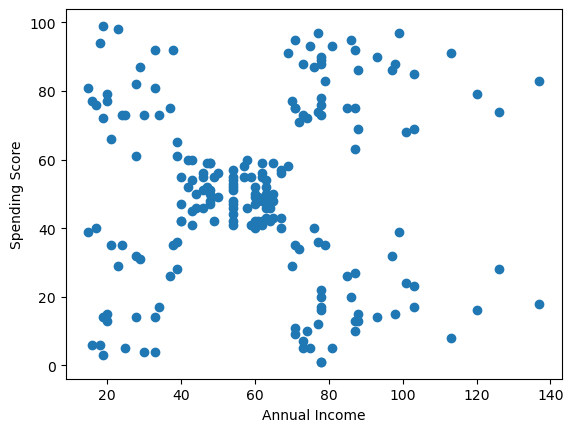

In [26]:
plt.scatter(X[...,0],X[...,1])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### Importing K Means Algorithm

In [37]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [38]:
wcss=[]
for i in range (1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

In [39]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 30259.65720728547,
 25095.703209997548,
 21830.041978049438,
 20736.679938924124]

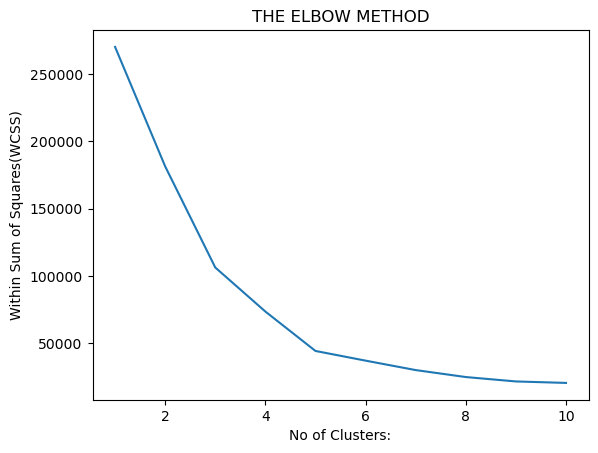

In [40]:
plt.plot(range(1,11),wcss)
plt.title('THE ELBOW METHOD')
plt.xlabel('No of Clusters:')
plt.ylabel('Within Sum of Squares(WCSS)')
plt.show()

In [41]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)
Y_kmeans = kmeans.fit_predict(X)
Y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [55]:
X[Y_kmeans==4,1]

array([39,  6, 40,  6,  3, 14, 15, 13, 35, 29, 35,  5, 14, 32, 31,  4,  4,
       14, 17, 26, 35, 36, 28], dtype=int64)

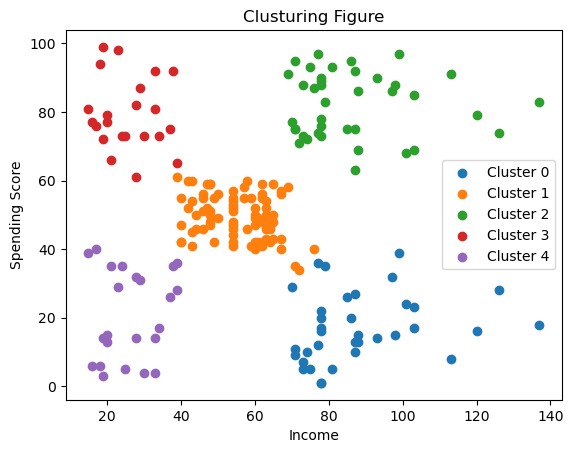

In [61]:
plt.scatter(X[Y_kmeans==0,0],X[Y_kmeans==0,1],label='Cluster 0')
plt.scatter(X[Y_kmeans==1,0],X[Y_kmeans==1,1],label='Cluster 1')
plt.scatter(X[Y_kmeans==2,0],X[Y_kmeans==2,1],label='Cluster 2')
plt.scatter(X[Y_kmeans==3,0],X[Y_kmeans==3,1],label='Cluster 3')
plt.scatter(X[Y_kmeans==4,0],X[Y_kmeans==4,1],label='Cluster 4')

plt.title('Clusturing Figure')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


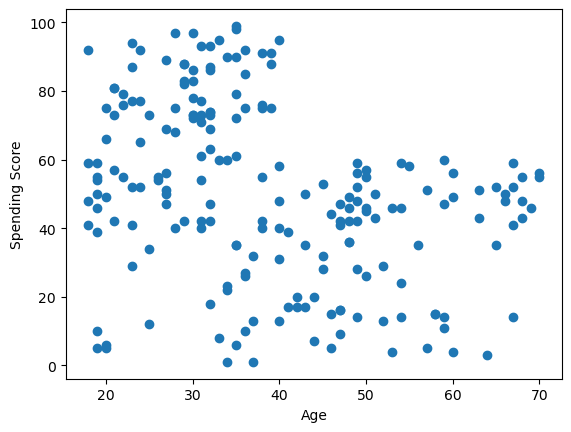

In [78]:
A = df.iloc[:,[2,4]].values
plt.scatter(A[...,0],A[...,1])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

In [79]:
wss=[]
for i in range (1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(A)
    wss.append(kmeans.inertia_)
    

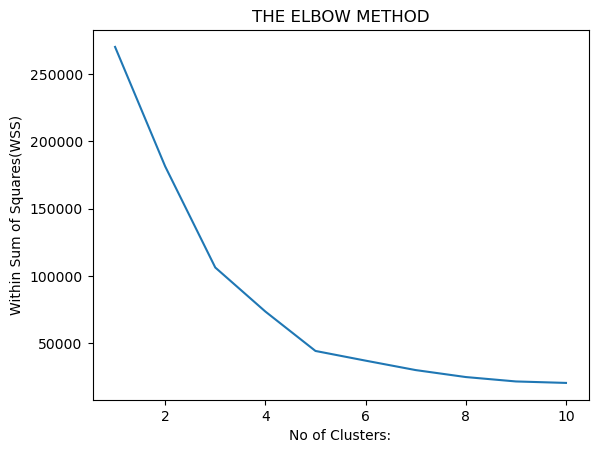

In [68]:
plt.plot(range(1,11),wss)
plt.title('THE ELBOW METHOD')
plt.xlabel('No of Clusters:')
plt.ylabel('Within Sum of Squares(WSS)')
plt.show()

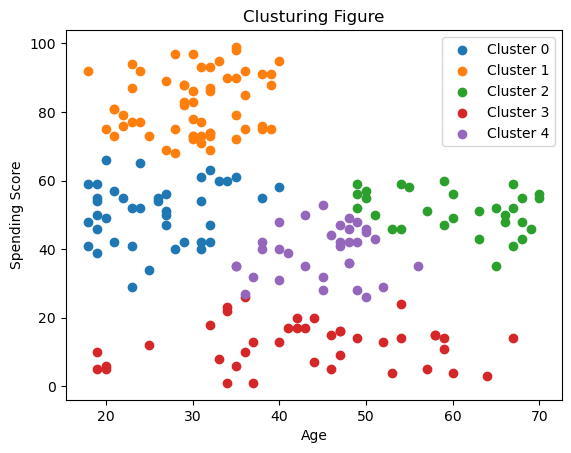

In [80]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)
Y_kmeans = kmeans.fit_predict(A)
plt.scatter(A[Y_kmeans==0,0],A[Y_kmeans==0,1],label='Cluster 0')
plt.scatter(A[Y_kmeans==1,0],A[Y_kmeans==1,1],label='Cluster 1')
plt.scatter(A[Y_kmeans==2,0],A[Y_kmeans==2,1],label='Cluster 2')
plt.scatter(A[Y_kmeans==3,0],A[Y_kmeans==3,1],label='Cluster 3')
plt.scatter(A[Y_kmeans==4,0],A[Y_kmeans==4,1],label='Cluster 4')

plt.title('Clusturing Figure')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()